# This Model Predicts whether the image is of a cat or a dog by using Convolution Neural Network.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras import layers
import cv2, os
from tqdm import tqdm
from random import shuffle
import shutil

The Data Contains 24960 images of both Cats and Dogs

In [2]:
!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/tanmay/dogvcat.zip"
!unzip -qo dogvcat.zip

--2024-03-16 19:17:09--  https://cainvas-static.s3.amazonaws.com/media/user_data/tanmay/dogvcat.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.158.203, 52.219.64.0, 52.219.160.59, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.158.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60547127 (58M) [application/zip]
Saving to: ‘dogvcat.zip’

dogvcat.zip         100%[===================>]  57.74M  12.0MB/s    in 6.4s    

2024-03-16 19:17:16 (9.03 MB/s) - ‘dogvcat.zip’ saved [60547127/60547127]



We use ImageDataGenerator to scale the pixel size, change the color of the image from BGR to Gray and also to split the Data in Training and Validation set.

In [3]:
train_dir= "./datset/training"
test_dir= "./datset/testing/"
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split= 0.2)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(50,50), color_mode='grayscale', batch_size=20, class_mode='binary', subset= 'training')
val_generator = train_datagen.flow_from_directory(train_dir, target_size=(50,50), color_mode='grayscale', batch_size=20, class_mode='binary', subset= 'validation')

Found 19860 images belonging to 2 classes.
Found 4963 images belonging to 2 classes.


Since the Data is in image form I’m using Convolutional Neural Network in order to find different patterns in the image which will help in differentiating the labels (cats&dogs).

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu',input_shape=(50,50,1), padding='same'))

# model.add(LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))

# model.add(tf.keras.activations.relu(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))

# model.add(tf.keras.activations.relu(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))

# model.add(tf.keras.activations.relu(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# model.add(tf.keras.activations.relu(alpha=0.1))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 64)          0

Compiling and Fitting the Model

In [5]:
# Model Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_generator, epochs=20, validation_data=val_generator, validation_steps=50)

Epoch 1/20


<ipython-input-5-72183d3709fe>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=20, validation_data=val_generator, validation_steps=50)


993/993 [==============================] - 20s 13ms/step - loss: 0.6817 - accuracy: 0.5579 - val_loss: 0.6626 - val_accuracy: 0.6000
Epoch 2/20
993/993 [==============================] - 12s 12ms/step - loss: 0.6409 - accuracy: 0.6396 - val_loss: 0.5797 - val_accuracy: 0.6990
Epoch 3/20
993/993 [==============================] - 12s 12ms/step - loss: 0.5833 - accuracy: 0.6980 - val_loss: 0.5276 - val_accuracy: 0.7320
Epoch 4/20
993/993 [==============================] - 13s 13ms/step - loss: 0.5302 - accuracy: 0.7392 - val_loss: 0.5106 - val_accuracy: 0.7370
Epoch 5/20
993/993 [==============================] - 12s 12ms/step - loss: 0.4908 - accuracy: 0.7668 - val_loss: 0.4633 - val_accuracy: 0.7870
Epoch 6/20
993/993 [==============================] - 12s 12ms/step - loss: 0.4558 - accuracy: 0.7896 - val_loss: 0.4560 - val_accuracy: 0.7790
Epoch 7/20
993/993 [==============================] - 12s 12ms/step - loss: 0.4322 - accuracy: 0.7996 - val_loss: 0.4337 - val_accuracy: 0.7850
Epo

Plotting Accuracy

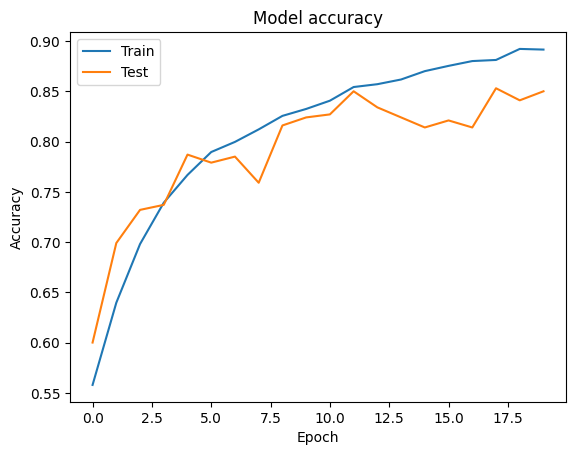

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Plotting Loss

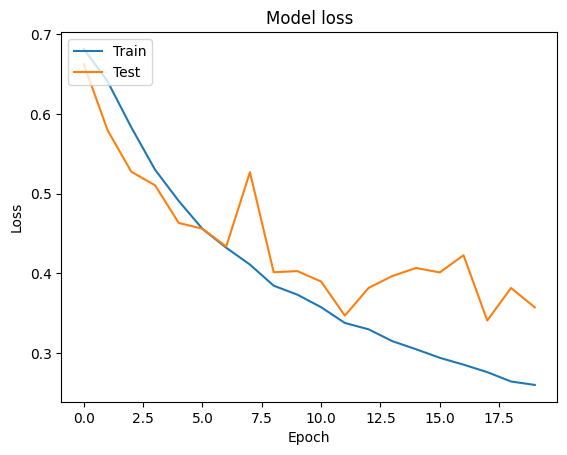

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Model Predictions

Here are some predictions made on the Test Images.



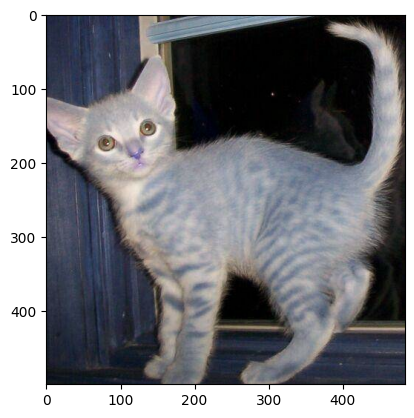

1/1 [==============================] - 0s 293ms/step
cat


In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def Single_Image_Prediction(file):
    # image = load_img(file, color_mode='rgb', target_size=(128, 128))
    image = cv2.imread(file)
    plt.imshow(image)
    plt.show()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (50, 50))
    img_arr = img_to_array(image)
    img_arr = img_arr/255.
    np_image = np.expand_dims(img_arr, axis=0)
    return np_image
image = Single_Image_Prediction('./datset/testing/6.jpg')
pred_value = model.predict(image)

if pred_value < 0.5:
    print('cat')
else:
    print('dog')

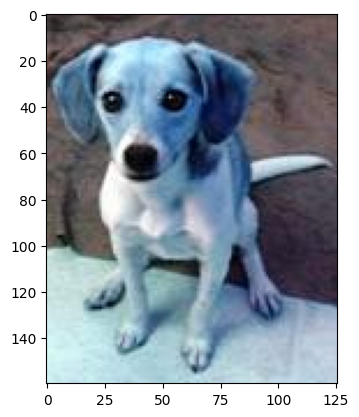

1/1 [==============================] - 0s 53ms/step
dog


In [20]:
image = Single_Image_Prediction('./datset/testing/9.jpg')
pred_value = model.predict(image)

if pred_value < 0.5:
    print('cat')
else:
    print('dog')